# Benchmarking `nvjpeg` 📊

In [52]:
%run benchmark_nvjpeg_complete.py

Combination 1/90
Combination 2/90
Combination 3/90
Combination 4/90
Combination 5/90
Combination 6/90
Combination 7/90
Combination 8/90
Combination 9/90
Combination 10/90
Combination 11/90
Combination 12/90
Combination 13/90
Combination 14/90
Combination 15/90
Combination 16/90
Combination 17/90
Combination 18/90
Combination 19/90
Combination 20/90
Combination 21/90
Combination 22/90
Combination 23/90
Combination 24/90
Combination 25/90
Combination 26/90
Combination 27/90
Combination 28/90
Combination 29/90
Combination 30/90
Combination 31/90
Combination 32/90
Combination 33/90
Combination 34/90
Combination 35/90
Combination 36/90
Combination 37/90
Combination 38/90
Combination 39/90
Combination 40/90
Combination 41/90
Combination 42/90
Combination 43/90
Combination 44/90
Combination 45/90
Combination 46/90
Combination 47/90
Combination 48/90
Combination 49/90
Combination 50/90
Combination 51/90
Combination 52/90
Combination 53/90
Combination 54/90
Combination 55/90
Combination 56/90
C

<Figure size 640x480 with 0 Axes>

# 📈 Data Visualization & Analysis

Now we will plot the collected data to understand the results. We will focus on:
1.  **Rate-Distortion:** How do quality metrics (like VMAF) change with file size?
2.  **Quality vs. File Size:** How does the `-quality` setting impact file size for different subsampling methods?
3.  **Encoding Performance:** Which Format method is fastest? How does resolution affect encoding time?
4.  **Decoding Performance:** How does resolution affect decoding time?

In [53]:
# --- Main Configuration ---
# Resolutions to test (Name: (Width, Height))
RESOLUTIONS = {
    '1280x720': (1280, 720),
    '1920x1080': (1920, 1080),
    '3840x2160': (3840, 2160),
}

RESOLUTION_TO_FILENAME = {
    '1280x720': 'frame_hd.rgb',
    '1920x1080': 'frame_fullhd.rgb',
    '3840x2160': 'frame_ultrahd.rgb',
}

# Parameters to benchmark
QUALITIES = range(10, 101, 1)
SUBSAMPLINGS = ['4:4:4', '4:2:2', '4:2:0']

SUBSAMPLING_TO_PARAM = {
    '4:4:4': '444',
    '4:2:2': '422',
    '4:2:0': '420'
}

In [54]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('results_nvjpeg_complete.csv')
df.head()

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
0,1280x720,10,4:4:4,10,0.000324,0.166623,0.000983,0.002820,0.131003,0.000003,47.241,27.878918,0.796885,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
1,1280x720,10,4:2:2,10,0.001516,0.156675,0.000949,0.002102,0.145146,0.000003,39.696,27.727669,0.795833,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
2,1280x720,10,4:2:0,10,0.000278,0.134753,0.001067,0.001741,0.121029,0.000003,36.314,27.585447,0.795781,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
3,1280x720,20,4:4:4,10,0.000301,0.129112,0.001149,0.003039,0.120343,0.000003,67.020,30.552410,0.867007,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
4,1280x720,20,4:2:2,10,0.000325,0.132288,0.001146,0.002266,0.116533,0.000003,58.633,30.216013,0.864293,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [56]:
# Set plot style
sns.set_theme(style="whitegrid")

## Encoding Parameters vs. quality metrics

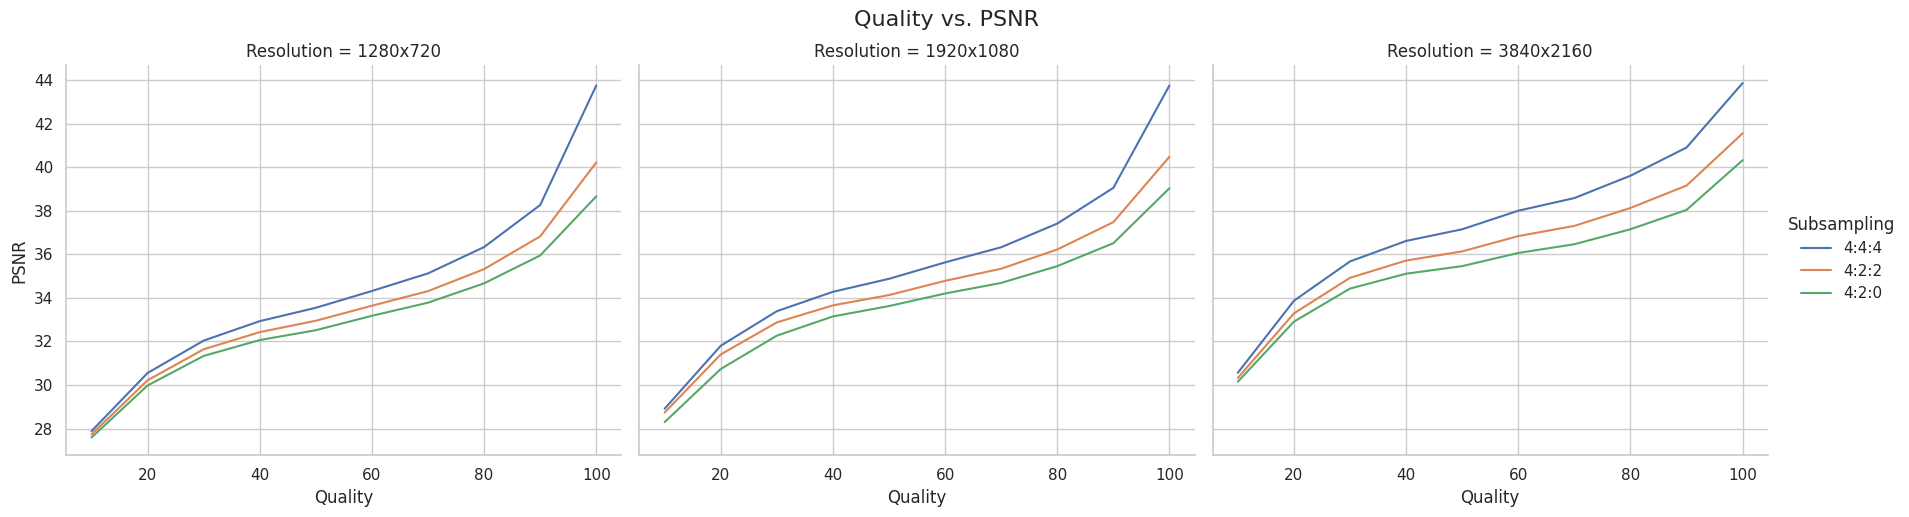

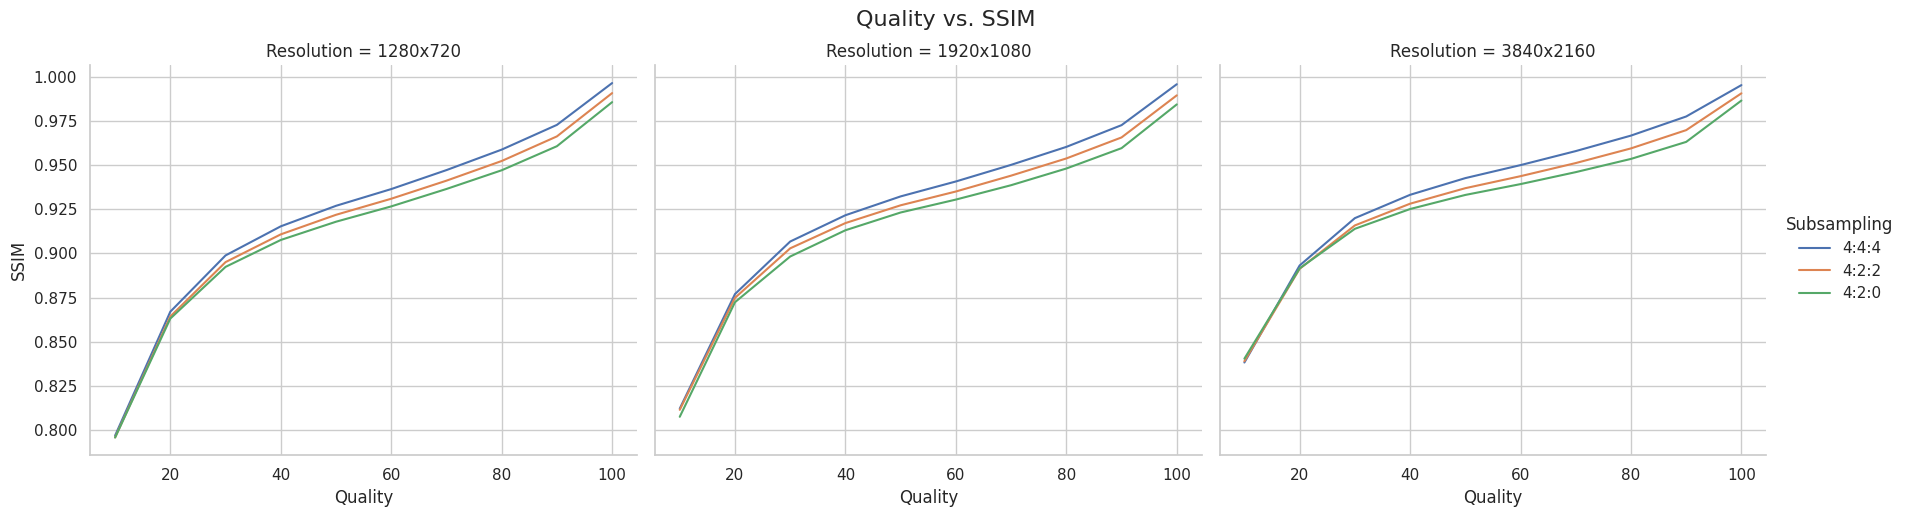

In [57]:
x = 'Quality'
y = 'PSNR'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    hue='Subsampling',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False}
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

x = 'Quality'
y = 'SSIM'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    hue='Subsampling',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False}
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

## Encoding Parameters vs. File Size


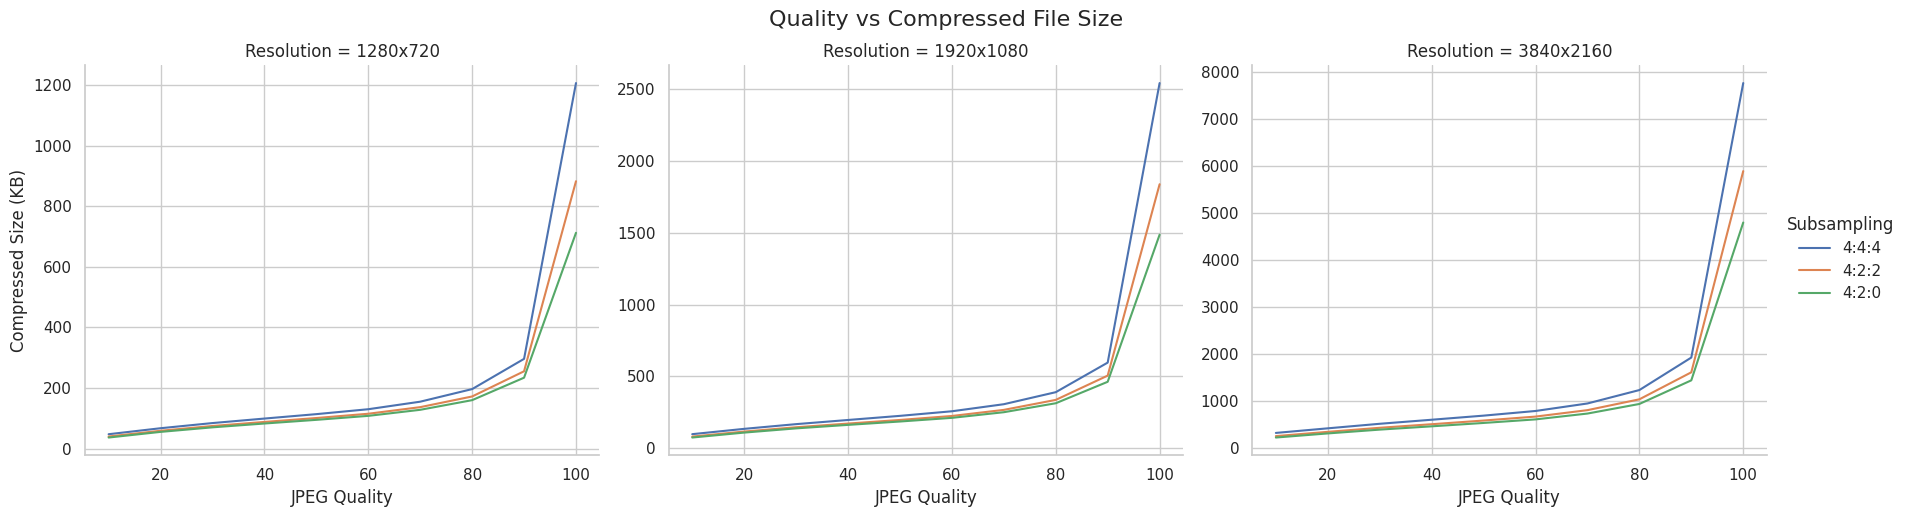

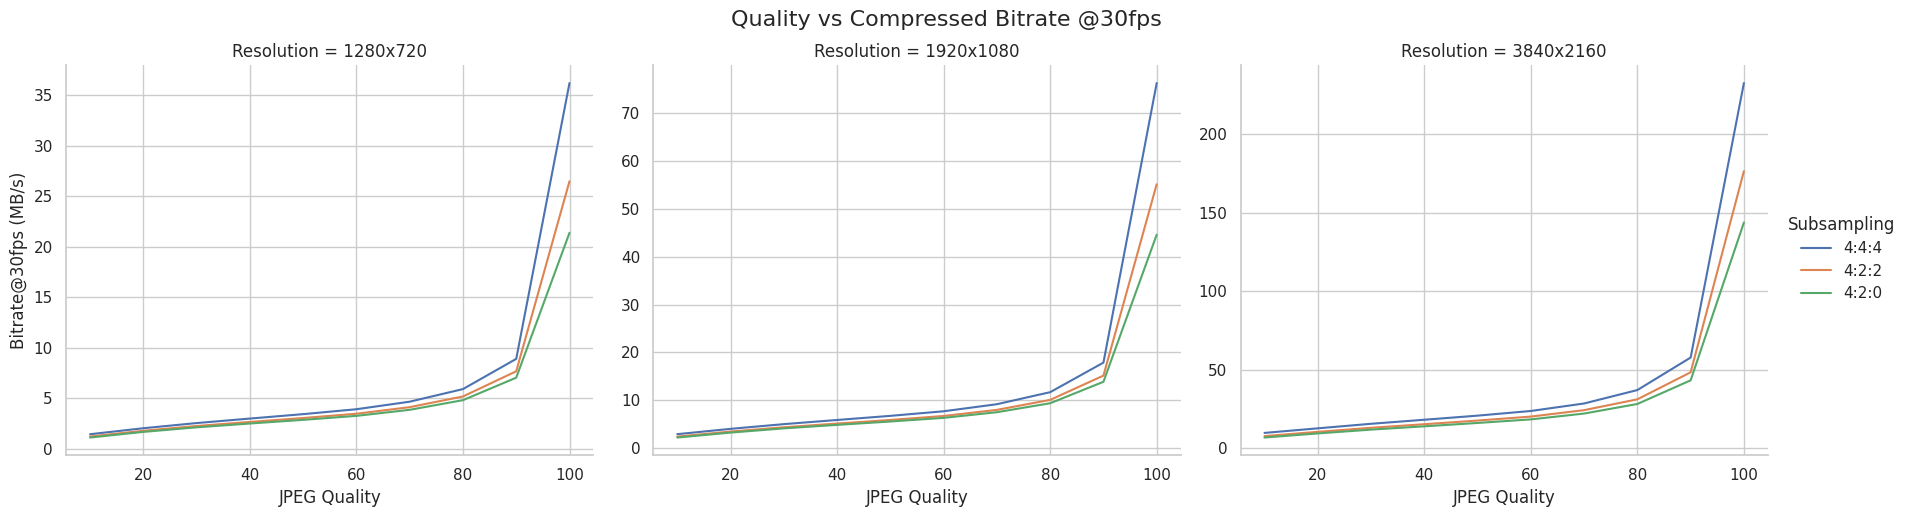

In [58]:
g = sns.relplot(
    data=df,
    x='Quality',
    y='Compressed Size (KB)',
    hue='Subsampling',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Compressed File Size', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Compressed Size (KB)')
plt.show()

fps = 30
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Compressed Size (KB)'] * fps / 1000,
    hue='Subsampling',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False},
)
g.figure.suptitle(f'Quality vs Compressed Bitrate @{fps}fps', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', f'Bitrate@{fps}fps (MB/s)')
plt.show()

We can observe an explosion in file size from quality 95 onwards, and a sharp increase from quality 90 onwards.

## Encoding Parameters vs. Performance

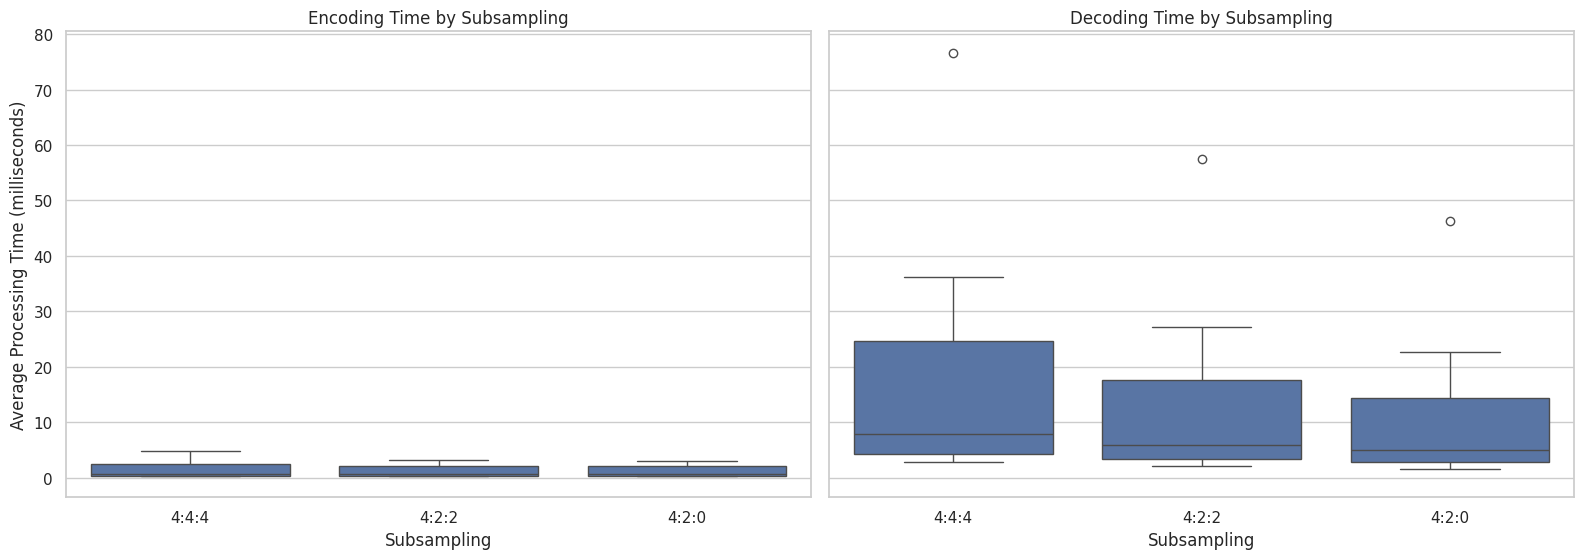

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
# Plot #1: Encoding time by Subsampling method
sns.boxplot(
    data=df,
    x='Subsampling',
    y=df['Avg Encode Time (s)'] * 1000,
    order=SUBSAMPLINGS,
    ax=ax[0]
)
ax[0].set_title('Encoding Time by Subsampling')
ax[0].set_ylabel('Average Processing Time (milliseconds)')

# Plot #2: Decoding time by Subsampling method
sns.boxplot(
    data=df,
    x='Subsampling',
    y=df['Avg Decode Time (s)'] * 1000,
    order=SUBSAMPLINGS,
    ax=ax[1]
)
ax[1].set_title('Decoding Time by Subsampling')
plt.tight_layout(rect=[0.0, 0.0, 1.0, 0.96])
plt.show()

In [60]:
df = df[df['Subsampling'] == '4:2:0']

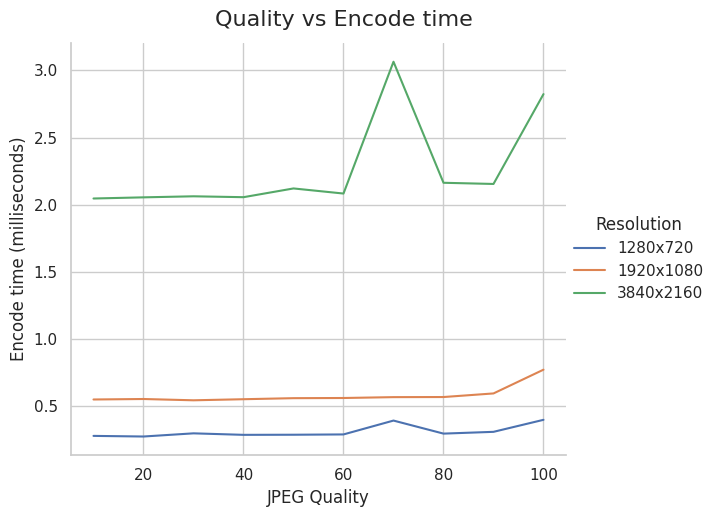

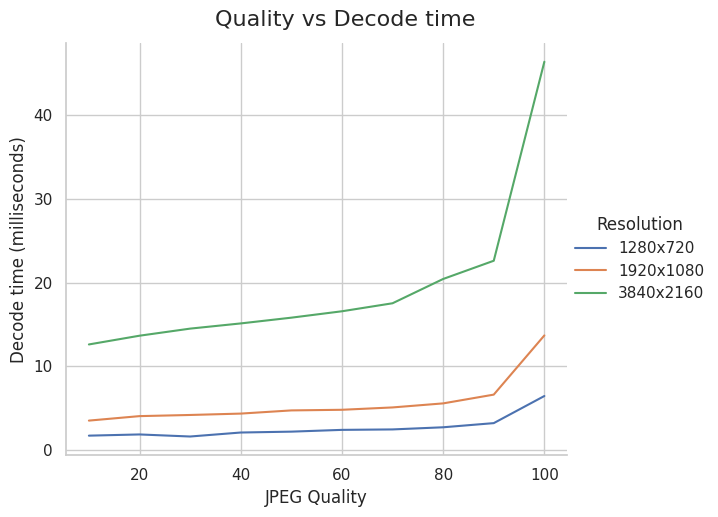

In [61]:
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Encode Time (s)'] * 1000,
    hue='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Encode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Encode time (milliseconds)')
plt.show()

g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Decode Time (s)'] * 1000,
    hue='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Decode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Decode time (milliseconds)')
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 2 * 2]
plt.show()

In [62]:
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 2 * 2]
#df = df[df['Avg Encode Time (s)'] * 1000 <= 2]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 2]
df.sort_values(by='SSIM', ascending=False).head(5)

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
26,1280x720,90,4:2:0,10,0.000308,0.128614,0.001143,0.003235,0.141311,0.000003,233.879,35.954357,0.960647,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
23,1280x720,80,4:2:0,10,0.000295,0.127169,0.001126,0.002739,0.125720,0.000003,159.676,34.672737,0.947032,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
20,1280x720,70,4:2:0,10,0.000392,0.128029,0.001106,0.002483,0.127090,0.000003,127.818,33.783844,0.936441,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
17,1280x720,60,4:2:0,10,0.000289,0.141955,0.001116,0.002430,0.138141,0.000003,107.829,33.181210,0.926587,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
14,1280x720,50,4:2:0,10,0.000287,0.136642,0.000983,0.002219,0.123760,0.000003,94.690,32.518944,0.917912,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [63]:
df[df['Resolution'] == '1920x1080'].sort_values(by='SSIM', ascending=False).head(5)


,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD


In [64]:
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 1.5 * 2]
#df = df[df['Avg Encode Time (s)'] * 1000 <= 1.5]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 1.5]
df.sort_values(by='SSIM', ascending=False).head(5)

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
20,1280x720,70,4:2:0,10,0.000392,0.128029,0.001106,0.002483,0.127090,0.000003,127.818,33.783844,0.936441,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
17,1280x720,60,4:2:0,10,0.000289,0.141955,0.001116,0.002430,0.138141,0.000003,107.829,33.181210,0.926587,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
14,1280x720,50,4:2:0,10,0.000287,0.136642,0.000983,0.002219,0.123760,0.000003,94.690,32.518944,0.917912,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
11,1280x720,40,4:2:0,10,0.000286,0.126045,0.001045,0.002114,0.125393,0.000003,82.585,32.065929,0.907584,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
8,1280x720,30,4:2:0,10,0.000297,0.140908,0.001255,0.001638,0.115400,0.000003,69.973,31.336771,0.892357,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [65]:
df[df['Resolution'] == '1920x1080'].sort_values(by='SSIM', ascending=False).head(5)


,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD


In [66]:
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 1 * 2]
#df = df[df['Avg Encode Time (s)'] * 1000 <= 1]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 1]
df.sort_values(by='SSIM', ascending=False).head(5)

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
8,1280x720,30,4:2:0,10,0.000297,0.140908,0.001255,0.001638,0.1154,0.000003,69.973,31.336771,0.892357,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [67]:
df[df['Resolution'] == '1920x1080'].sort_values(by='SSIM', ascending=False).head(5)


,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD


In [68]:
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 0.5 * 2]
#df = df[df['Avg Encode Time (s)'] * 1000 <= 0.5]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 0.5]
df.sort_values(by='SSIM', ascending=False).head(5)

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
